## Environment

### Jupyter notebook

 - It is a web-based environment for interactive development of code.
 - You can interleave cells containing code (in our case, **Python 3**) or comments (in **markdown**); you can select the cell content type (`code` or `Markdown`) by selecting it in the dropdown menu in your taskbar; the code kernel is chosen in the right side of the task bar.
 - It is an interactive code environment, best suited for _prototyping_ and _demoing_;
 - Each cell can work in two modes: _write mode_ (green outline), by selecting the cell content, and _command mode_ (blue outline), by selecting its left side;
 - In _write mode_, you can run the code in a cell pressing `Shift+Enter` (goes to the next cell), `Alt+Enter` (goes to the output block) or `Ctrl+Enter` (creates a new empty cell).
  - Be careful of the side-effects of running cells _out of order_!
 - In command mode, press `A` and `B` to add a new cell before and after the current one, respectively, or press `DD` in quick succession to delete it.
 

### Setup
- The necessary packages need to be installed from a terminal (In Jupyter, instructions starting with `!`). 
- Some environments, such as `conda`, come up with a set of pre-installed packages, which include the most commonly used ones.
- The packages have then to be imported with the `import` instruction to make the functions and classes available for use.
- To import specific functions from a package: `from {package} import {function}`.
- To give an alias to the package: `import {package} as {alias}`.
- Paths in Jupyter are relative to the path of this file, so be careful of your project path structure to load content.

In [1]:
%%capture

# Installation of the required packages (in case they are not present in your environment). 
# Adding a requirements.txt file in your folder is a de facto standard to list all the packages needed for this project
!pip install -r requirements.txt

In [2]:
# Importing the required packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import skimage
import scipy.ndimage

# Folder of your image files (Relative to this file path)
img_folder = "images/"

## Basic operations on images

### Reading from a file

To recover the placement of the image, it is necessary to resolve its absolute path in your project organization. 
In the following example, we open a grayscale image and we save it over a bidimensional array `img_barbara`. This is a **numpy array**, a multidimentional and homogeneous array whose entries represent the intensity of the image at each pixel.

**Image formats:**  When the image is loaded, however, the intensities are typically represented as `uint8` (8-bit unsigned), spanning the interval $[0, 255]$. Most image processing utilities work with `float` types, for which the intensities are floating point values in the interval $[0, 1]$. For the purpose of processing, it is typically necessary to switch between these two representations.

In [3]:
img_barbara = skimage.io.imread(img_folder + "barbara.tif")
print(f"Type of the loaded image: {type(img_barbara)}")
print(f"Data type of the pixel intensities (entries of the array): {img_barbara.dtype}")
print(f"Range of the pixel intensities: [{np.min(img_barbara)}, {np.max(img_barbara)}]")

img_barbara = skimage.img_as_float(img_barbara)  # Equivalent to: img_barbara.astype(float)/255
print(f"Data type of the pixel intensities (entries of the array): {img_barbara.dtype}")
print(f"New range of the pixel intensities: [{np.min(img_barbara)}, {np.max(img_barbara)}]")

Type of the loaded image: <class 'numpy.ndarray'>
Data type of the pixel intensities (entries of the array): uint8
Range of the pixel intensities: [12, 246]
Data type of the pixel intensities (entries of the array): float64
New range of the pixel intensities: [0.047058823529411764, 0.9647058823529412]


### Displaying
The `mathplotlib` package provides: 
- the `figure()` function to set the canvas (the key `figsize` can adjust the size of your canvas)
    - `subplots()` can be used to draw more figures on the same canvas
- the `imshow()` function to plot an image (the `cmap` key defines the colormap to employ for monochromatic images)
- the `show()` function to display all the figures that were produced (typically called at the end of your routine).

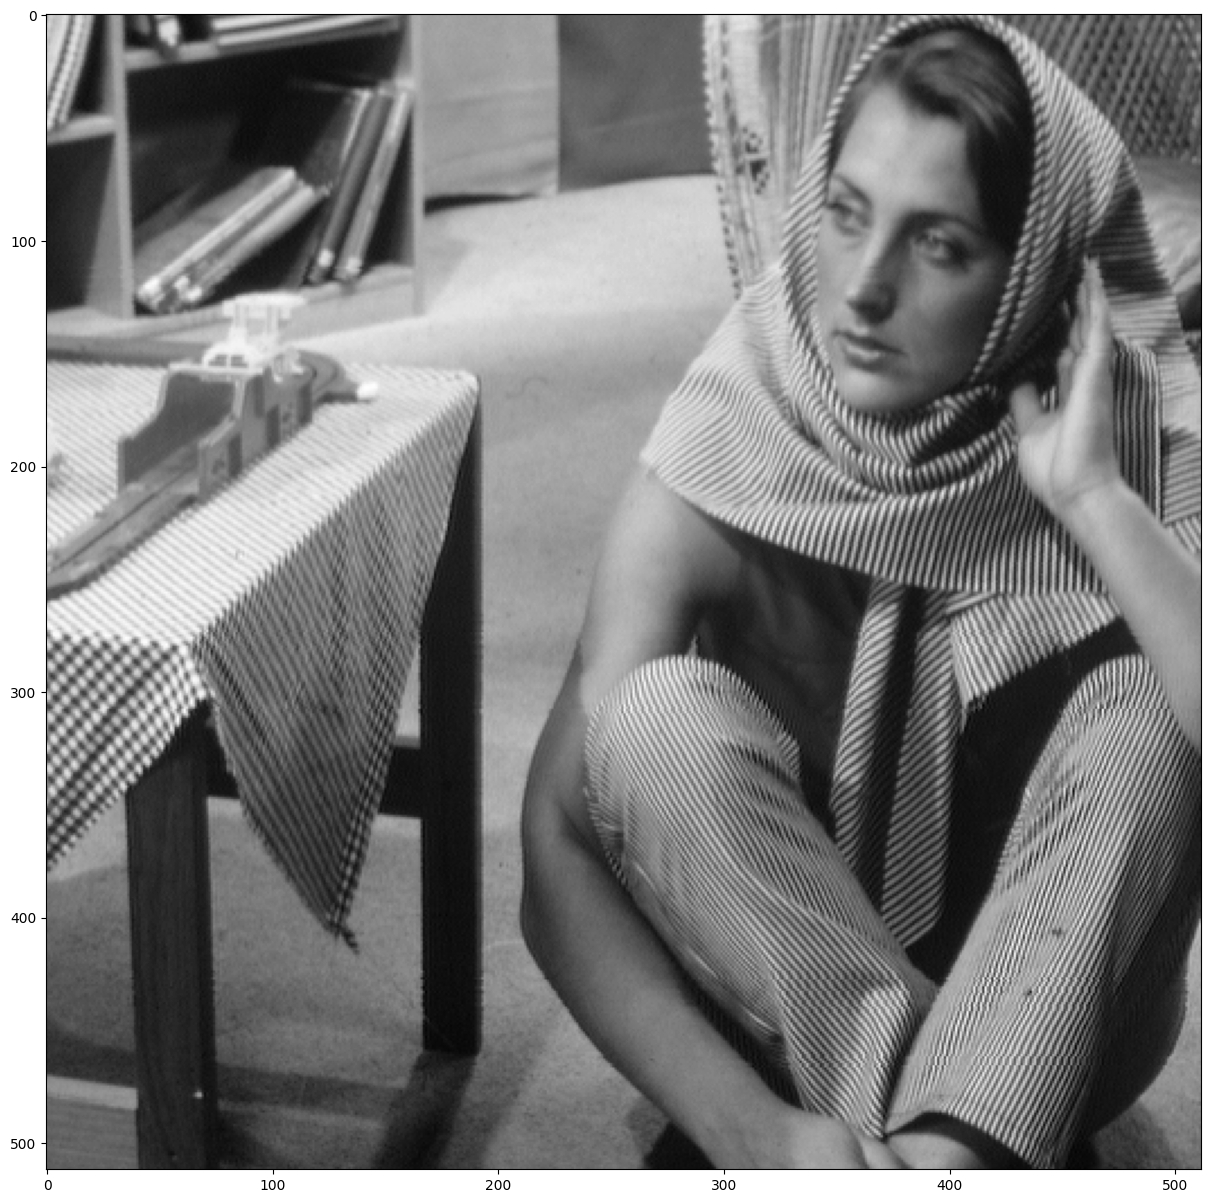

In [4]:
plt.figure(figsize=(15, 15)) 
plt.imshow(img_barbara, cmap='gray')
plt.show()

### Slicing
Let us consider for simplicity a generic monodimensional numpy array `arr` of length `N`:
- An element of the array is accessed through square brackets `arr[index]`
- The indexes `index` go from `0` to `N-1`. 
- The array can be accessef from the end using negative indices, going from `-1` to `-N`

the slicing operation is performed with any of the following operations:
- `arr[start:stop]`
- `arr[start:stop:step]`

where:

- `start` is the starting index (if not specified, it defaults to `0`, the first index of an array).
- `stop` is the ending index (if not specified, it defaults to `N`). 
    - Note: the ending index itself is not included in the final sliced array
- `step` is the step size, allowing to take every `step`-th sample (if not specified, it defaults to `1`)

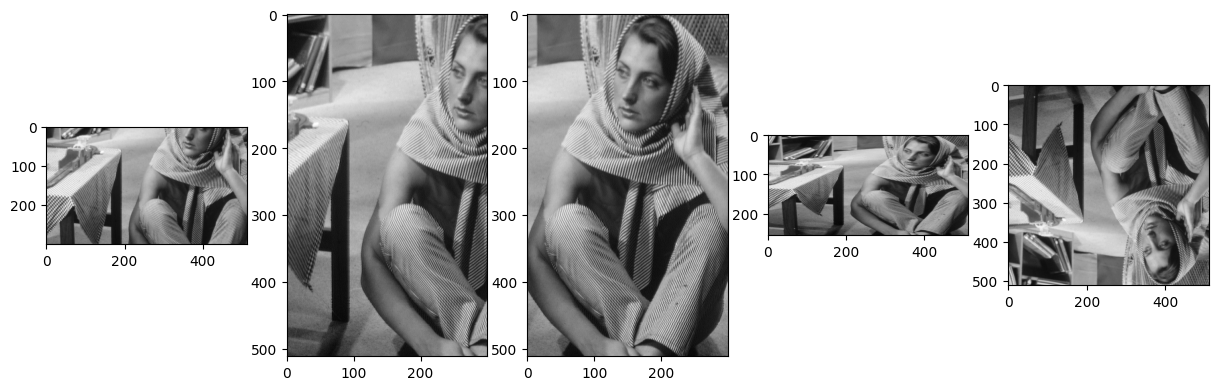

In [5]:
fig, ax = plt.subplots(1,5, figsize=(15,15))
ax[0].imshow(img_barbara[100:400,:], cmap="gray")  # Horizontal slice
ax[1].imshow(img_barbara[:, 100:400], cmap="gray")  # Vertical slice (starting from zero)
ax[2].imshow(img_barbara[:, -300:], cmap="gray")  # Negative indices denote positions starting from the opposite end
ax[3].imshow(img_barbara[::2, :], cmap="gray")  #  Takes a row every 2 (result: all the even indexed rows)
ax[4].imshow(img_barbara[::-1, :], cmap="gray")  # Flipping an image on the horizontal side
plt.show()


### Mathematical operations

Let: 
- `a` be a scalar
- `img1` and `img2` be bidimensional numpy array with the same dimensions $M \times N$ (e.g. representing two images)
- `arr` be a monodimensional array of dimension $M$

**Multidimensional arrays**:
- In `numpy`, unlike MATLAB, vectors and matrices must be strictly defined and are not interchangeable;
- To describe a vector `arr`$\in\mathbb{R}^{N_1}$ as an matrix a new axis must be introduced:
    - `arr[:, np.newaxis]` generates a matrix with a singleton row dimension ($\in\mathbb{R}^{1 \times M}$)
    - `arr[np.newaxis, :]` generates a matrix with a singleton column dimension ($\in\mathbb{R}^{M \times 1}$)


**Broadcasting**:
- Mathematical operations (`+`, `-`, `*`, `\`, `**`, etc.) on numpy arrays are considered elementwise:
    - `img1 + img2` returns an array whose element are the sum of the corresponding elements of each array
- Operation with scalars are broadcasted over all the elements:
    - `a * img1` returns a $M \times N$ array where all the elements of `img1` have been multiplied by `a`
- Any operation can be broadcasted as long as the dimensions of the operants are coherent:
    - `img1 / arr[:, np.newaxis]` is equivalent to apply an elementwise division by `arr` on each row of `img1`
    - `np.newaxis` is needed, as both arguments are required to be bidimensional

Sizes of the image: (512, 512)
Size of the filter: (512,)
Size of the filter to broadcast: (512, 1)


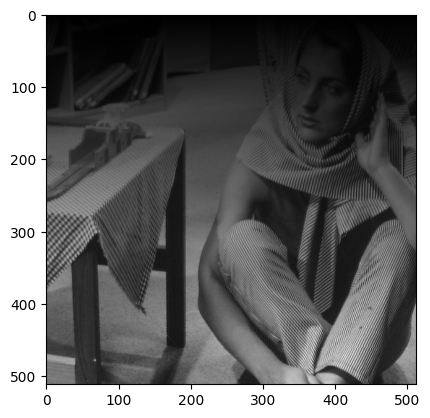

In [6]:
# Example: Applying a linear shading along a direction

(nb_rows, nb_cols) = img_barbara.shape
shade_filter_h = np.linspace(0, 1, nb_rows) # Creates an array increasing linearly from 0 to 1
shade_filter_v = np.linspace(0, 1, nb_cols)

print(f"Sizes of the image: {img_barbara.shape}")
print(f"Size of the filter: {shade_filter_h.shape}")
print(f"Size of the filter to broadcast: {shade_filter_h[:, np.newaxis].shape}")

img_shaded_v = img_barbara * shade_filter_h[:, np.newaxis] # Vertical shading (Note: axis is added to the end)
img_shaded_h = img_barbara * shade_filter_v[np.newaxis, :] # Horizontal shading

plt.imshow(img_shaded_v, cmap="gray")
plt.show()